In [1]:
#import Regression_variables from same directory
from regression_variable_morgan_comparison import *
from sklearn.model_selection import cross_val_score

# Set path to this notebook
HERE = Path(_dh[-1])
DATA = HERE / "data"

# compounds is the name of the data frame

2024-08-08 22:43:44.033952: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.



Assign cluster ID

Assign cluster ID


  0%|          | 0/595 [00:00<?, ?it/s][22:45:23] DEPRECATION WARNING: please use MorganGenerator
[22:45:23] DEPRECATION WARNING: please use MorganGenerator
[22:45:23] DEPRECATION WARNING: please use MorganGenerator
[22:45:23] DEPRECATION WARNING: please use MorganGenerator
[22:45:23] DEPRECATION WARNING: please use MorganGenerator
[22:45:23] DEPRECATION WARNING: please use MorganGenerator
[22:45:23] DEPRECATION WARNING: please use MorganGenerator
[22:45:23] DEPRECATION WARNING: please use MorganGenerator
[22:45:23] DEPRECATION WARNING: please use MorganGenerator
[22:45:23] DEPRECATION WARNING: please use MorganGenerator
[22:45:23] DEPRECATION WARNING: please use MorganGenerator
[22:45:23] DEPRECATION WARNING: please use MorganGenerator
[22:45:23] DEPRECATION WARNING: please use MorganGenerator
[22:45:23] DEPRECATION WARNING: please use MorganGenerator
[22:45:23] DEPRECATION WARNING: please use MorganGenerator
[22:45:23] DEPRECATION WARNING: please use MorganGenerator
[22:45:23] DEPREC

In [2]:
# Optuna Random Forest variables: MACCS
best_n_estimators_rand_TPE_MACCS = 323
best_max_depth_rand_TPE_MACCS = 8
best_min_samples_split_rand_TPE_MACCS = 2
best_min_samples_leaf_rand_TPE_MACCS = 1

# Scatter Plots for random forest (Random Split, UMAP Furthest Cluster Split)
### -MACCS
##### Best parameters found by Optuna:
##### n_estimators = 323
##### max_depth = 8
##### min_samples_split = 2
##### min_samples_leaf = 1

In [3]:
# Default Random Forest Variables (Random Split)
rfr_rand_MACCS = RandomForestRegressor(random_state=SEED)
rfr_rand_MACCS.fit(np.array(list((x_train_rand))).astype(float), y_train_rand)
y_pred_rfr_rand_MACCS_test = rfr_rand_MACCS.predict(np.array(list((x_test_rand))).astype(float))
mae_rfr_rand_MACCS = mean_absolute_error(y_test_rand, y_pred_rfr_rand_MACCS_test)
mse_rfr_rand_MACCS = mean_squared_error(y_test_rand, y_pred_rfr_rand_MACCS_test)
r2_rfr_rand_MACCS = r2_score(y_test_rand, y_pred_rfr_rand_MACCS_test)

rfr_rand_best_TPE_MACCS = RandomForestRegressor(random_state=SEED, n_estimators=best_n_estimators_rand_TPE_MACCS, max_depth=best_max_depth_rand_TPE_MACCS, min_samples_split=best_min_samples_split_rand_TPE_MACCS, min_samples_leaf=best_min_samples_leaf_rand_TPE_MACCS)
rfr_rand_best_TPE_MACCS.fit(np.array(list((x_train_rand))).astype(float), y_train_rand)
y_pred_rfr_rand_best_TPE_MACCS = rfr_rand_best_TPE_MACCS.predict(np.array(list((x_test_rand))).astype(float))

mae_rfr_rand_best_TPE_MACCS = mean_absolute_error(y_test_rand, y_pred_rfr_rand_best_TPE_MACCS)
mse_rfr_rand_best_TPE_MACCS = mean_squared_error(y_test_rand, y_pred_rfr_rand_best_TPE_MACCS)
r2_rfr_rand_best_TPE_MACCS = r2_score(y_test_rand, y_pred_rfr_rand_best_TPE_MACCS)

# Default Random Forest Variables (Furthest Cluster Split)
rfr_fur_MACCS = RandomForestRegressor(random_state=SEED)
rfr_fur_MACCS.fit(np.array(list((x_train_fur))).astype(float), y_train_fur)
y_pred_rfr_fur_MACCS_test = rfr_fur_MACCS.predict(np.array(list((x_test_fur))).astype(float))
mae_rfr_fur_MACCS = mean_absolute_error(y_test_fur, y_pred_rfr_fur_MACCS_test)
mse_rfr_fur_MACCS = mean_squared_error(y_test_fur, y_pred_rfr_fur_MACCS_test)
r2_rfr_fur_MACCS = r2_score(y_test_fur, y_pred_rfr_fur_MACCS_test)

rfr_fur_best_TPE_MACCS = RandomForestRegressor(random_state=SEED, n_estimators=best_n_estimators_rand_TPE_MACCS, max_depth=best_max_depth_rand_TPE_MACCS, min_samples_split=best_min_samples_split_rand_TPE_MACCS, min_samples_leaf=best_min_samples_leaf_rand_TPE_MACCS)
rfr_fur_best_TPE_MACCS.fit(np.array(list((x_train_fur))).astype(float), y_train_fur)
y_pred_rfr_fur_best_TPE_MACCS = rfr_fur_best_TPE_MACCS.predict(np.array(list((x_test_fur))).astype(float))

mae_rfr_fur_best_TPE_MACCS = mean_absolute_error(y_test_fur, y_pred_rfr_fur_best_TPE_MACCS)
mse_rfr_fur_best_TPE_MACCS = mean_squared_error(y_test_fur, y_pred_rfr_fur_best_TPE_MACCS)
r2_rfr_fur_best_TPE_MACCS = r2_score(y_test_fur, y_pred_rfr_fur_best_TPE_MACCS)


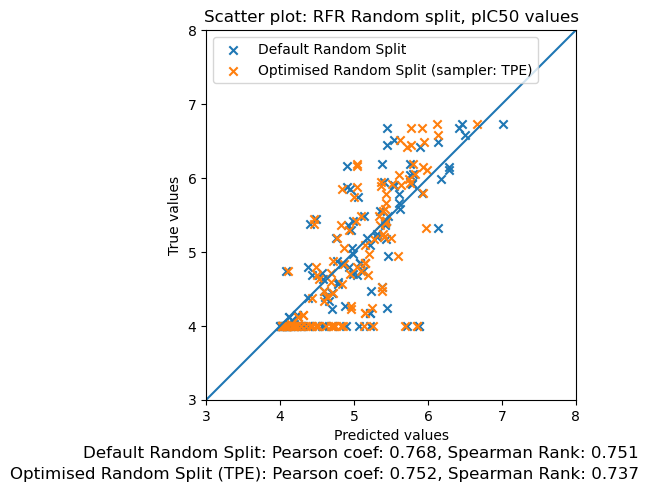

In [4]:
# Scatter plot
limits = 3, 8
fig, ax = plt.subplots()
ax.scatter(y_pred_rfr_rand_MACCS_test, y_test_rand, marker="x", label="Default Random Split")
ax.scatter(y_pred_rfr_rand_best_TPE_MACCS, y_test_rand, marker="x", label="Optimised Random Split (sampler: TPE)")
lin = np.linspace(*limits, 100)
ax.plot(lin, lin)
ax.set_aspect("equal", adjustable="box")
ax.set_xlabel("Predicted values")
ax.set_ylabel("True values")
ax.set_title("Scatter plot: RFR Random split, pIC50 values")
ax.set_xlim(limits)
ax.set_ylim(limits)

pearsoncoef_rfr_rand_best_TPE= np.corrcoef(y_pred_rfr_rand_best_TPE_MACCS.flatten(), y_test_rand.values.flatten())[0,1]
spearmancoef_rfr_rand_best_TPE = spearmanr(y_pred_rfr_rand_best_TPE_MACCS.flatten(), y_test_rand.values.flatten()).correlation
pearsoncoef_rfr_rand = np.corrcoef(y_pred_rfr_rand_MACCS_test.flatten(), y_test_rand.values.flatten())[0,1]
spearmancoef_rfr_rand = spearmanr(y_pred_rfr_rand_MACCS_test.flatten(), y_test_rand.values.flatten()).correlation
fig.text(0.9, -0.01, f"Default Random Split: Pearson coef: {pearsoncoef_rfr_rand:.3f}, Spearman Rank: {spearmancoef_rfr_rand:.3f}", horizontalalignment='right', fontsize=12)
fig.text(0.9, -0.055, f"Optimised Random Split (TPE): Pearson coef: {pearsoncoef_rfr_rand_best_TPE:.3f}, Spearman Rank: {spearmancoef_rfr_rand_best_TPE:.3f}", horizontalalignment='right', fontsize=12)

fig.savefig(DATA / "scatter_plot_rfr_TPE.png")
ax.legend()
plt.show();

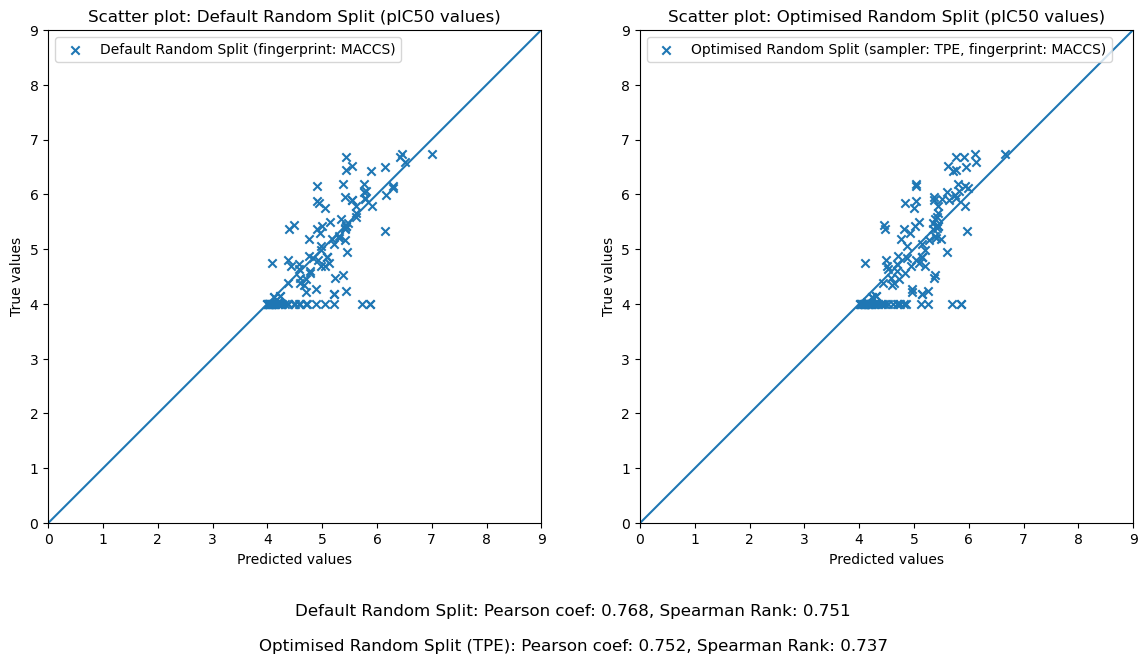

In [5]:
# Scatter plot side by side
limits = 0, 9
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 7))

# First scatter plot
ax1.scatter(y_pred_rfr_rand_MACCS_test, y_test_rand, marker="x", label="Default Random Split (fingerprint: MACCS)")
lin = np.linspace(*limits, 100)
ax1.plot(lin, lin)
ax1.set_aspect("equal", adjustable="box")
ax1.set_xlabel("Predicted values")
ax1.set_ylabel("True values")
ax1.set_title("Scatter plot: Default Random Split (pIC50 values)")
ax1.set_xlim(limits)
ax1.set_ylim(limits)
ax1.legend()

# Second scatter plot
ax2.scatter(y_pred_rfr_rand_best_TPE_MACCS, y_test_rand, marker="x", label="Optimised Random Split (sampler: TPE, fingerprint: MACCS)")
ax2.plot(lin, lin)
ax2.set_aspect("equal", adjustable="box")
ax2.set_xlabel("Predicted values")
ax2.set_ylabel("True values")
ax2.set_title("Scatter plot: Optimised Random Split (pIC50 values)")
ax2.set_xlim(limits)
ax2.set_ylim(limits)
ax2.legend()

# Calculate correlation coefficients
pearsoncoef_rfr_rand_best_TPE = np.corrcoef(y_pred_rfr_rand_best_TPE_MACCS.flatten(), y_test_rand.values.flatten())[0, 1]
spearmancoef_rfr_rand_best_TPE = spearmanr(y_pred_rfr_rand_best_TPE_MACCS.flatten(), y_test_rand.values.flatten()).correlation
pearsoncoef_rfr_rand = np.corrcoef(y_pred_rfr_rand_MACCS_test.flatten(), y_test_rand.values.flatten())[0, 1]
spearmancoef_rfr_rand = spearmanr(y_pred_rfr_rand_MACCS_test.flatten(), y_test_rand.values.flatten()).correlation

# Add text annotations
fig.text(0.5, 0.01, f"Default Random Split: Pearson coef: {pearsoncoef_rfr_rand:.3f}, Spearman Rank: {spearmancoef_rfr_rand:.3f}", horizontalalignment='center', fontsize=12)
fig.text(0.5, -0.04, f"Optimised Random Split (TPE): Pearson coef: {pearsoncoef_rfr_rand_best_TPE:.3f}, Spearman Rank: {spearmancoef_rfr_rand_best_TPE:.3f}", horizontalalignment='center', fontsize=12)

# Save the figure
fig.savefig(DATA / "scatter_plot_rfr_TPE_side_by_side.png")
plt.show()

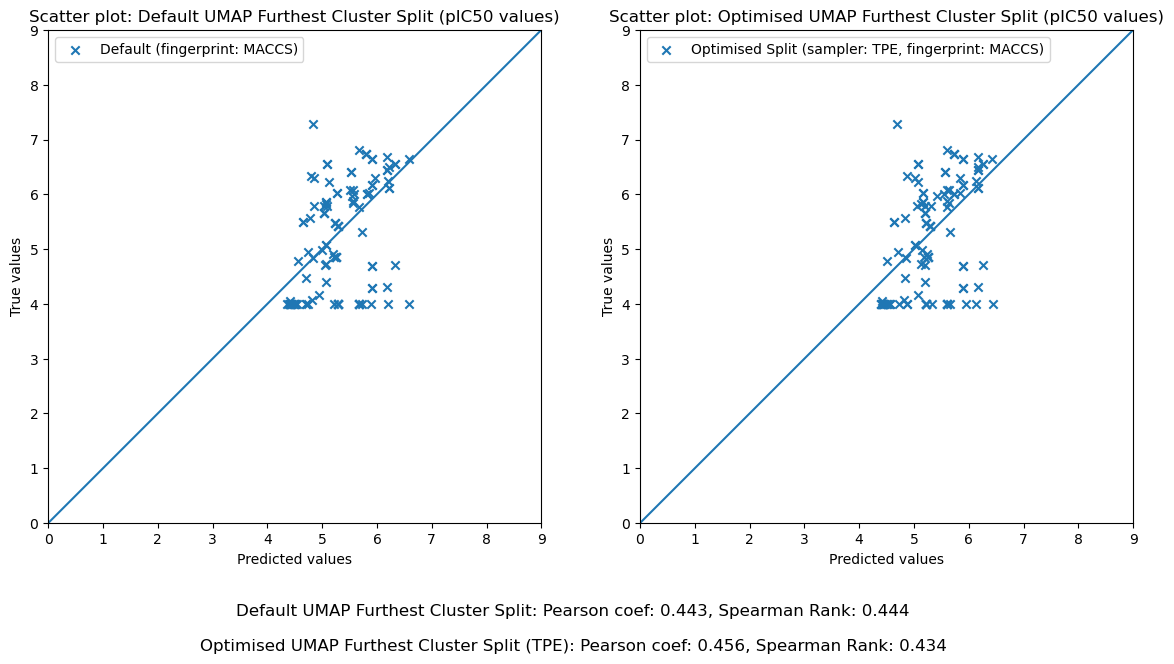

In [6]:
# Scatter plot side by side
limits = 0, 9
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 7))

# First scatter plot
ax1.scatter(y_pred_rfr_fur_MACCS_test, y_test_fur, marker="x", label="Default (fingerprint: MACCS)")
lin = np.linspace(*limits, 100)
ax1.plot(lin, lin)
ax1.set_aspect("equal", adjustable="box")
ax1.set_xlabel("Predicted values")
ax1.set_ylabel("True values")
ax1.set_title("Scatter plot: Default UMAP Furthest Cluster Split (pIC50 values)")
ax1.set_xlim(limits)
ax1.set_ylim(limits)
ax1.legend()

# Second scatter plot
ax2.scatter(y_pred_rfr_fur_best_TPE_MACCS, y_test_fur, marker="x", label="Optimised Split (sampler: TPE, fingerprint: MACCS)")
ax2.plot(lin, lin)
ax2.set_aspect("equal", adjustable="box")
ax2.set_xlabel("Predicted values")
ax2.set_ylabel("True values")
ax2.set_title("Scatter plot: Optimised UMAP Furthest Cluster Split (pIC50 values)")
ax2.set_xlim(limits)
ax2.set_ylim(limits)
ax2.legend()

# Calculate correlation coefficients
pearsoncoef_rfr_fur_best_TPE = np.corrcoef(y_pred_rfr_fur_best_TPE_MACCS.flatten(), y_test_fur.values.flatten())[0, 1]
spearmancoef_rfr_fur_best_TPE = spearmanr(y_pred_rfr_fur_best_TPE_MACCS.flatten(), y_test_fur.values.flatten()).correlation
pearsoncoef_rfr_fur = np.corrcoef(y_pred_rfr_fur_MACCS_test.flatten(), y_test_fur.values.flatten())[0, 1]
spearmancoef_rfr_fur = spearmanr(y_pred_rfr_fur_MACCS_test.flatten(), y_test_fur.values.flatten()).correlation

# Add text annotations
fig.text(0.5, 0.01, f"Default UMAP Furthest Cluster Split: Pearson coef: {pearsoncoef_rfr_fur:.3f}, Spearman Rank: {spearmancoef_rfr_fur:.3f}", horizontalalignment='center', fontsize=12)
fig.text(0.5, -0.04, f"Optimised UMAP Furthest Cluster Split (TPE): Pearson coef: {pearsoncoef_rfr_fur_best_TPE:.3f}, Spearman Rank: {spearmancoef_rfr_fur_best_TPE:.3f}", horizontalalignment='center', fontsize=12)

# Save the figure
fig.savefig(DATA / "scatter_plot_rfr_UMAP_fur_TPE_side_by_side.png")
plt.show()

# Test for Overfitting 
### MACCS 

### Training and Test metrics (Random Split)

In [7]:
# Default parameter random forest defined above as rfr_rand_MACCS
# Predict on the test set defined above as y_pred_rfr_rand_MACCS_test

# Predict on the training set
y_pred_rfr_rand_MACCS_train = rfr_rand_MACCS.predict(np.array(list((x_train_rand))).astype(float))

# Calculate metrics for the training set
mae_train0 = mean_absolute_error(y_train_rand, y_pred_rfr_rand_MACCS_train)
mse_train0 = mean_squared_error(y_train_rand, y_pred_rfr_rand_MACCS_train)
r2_train0 = r2_score(y_train_rand, y_pred_rfr_rand_MACCS_train)

# Calculate metrics for the test set
mae_test0 = mean_absolute_error(y_test_rand, y_pred_rfr_rand_MACCS_test)
mse_test0 = mean_squared_error(y_test_rand, y_pred_rfr_rand_MACCS_test)
r2_test0 = r2_score(y_test_rand, y_pred_rfr_rand_MACCS_test)

# Optuna Parameters !
# Predict on the training set
y_pred_rfr_rand_best_TPE_MACCS_train = rfr_rand_best_TPE_MACCS.predict(np.array(list((x_train_rand))).astype(float))

# y_pred_rfr_rand_best_TPE_MACCS defined above
# test metrics defined above

# Calculate metrics for the training set

mae_rfr_rand_best_TPE_MACCS_train = mean_absolute_error(y_train_rand, y_pred_rfr_rand_best_TPE_MACCS_train)
mse_rfr_rand_best_TPE_MACCS_train = mean_squared_error(y_train_rand, y_pred_rfr_rand_best_TPE_MACCS_train)
r2_rfr_rand_best_TPE_MACCS_train = r2_score(y_train_rand, y_pred_rfr_rand_best_TPE_MACCS_train)

print(f"Default: n_estimators={rfr_rand_MACCS.n_estimators}, max_depth={rfr_rand_MACCS.max_depth}, min_samples_split={rfr_rand_MACCS.min_samples_split}, min_samples_leaf={rfr_rand_MACCS.min_samples_leaf}")
print(f"Random Training Set Metrics:")
print(f"MAE: {mae_train0:.3f}")
print(f"MSE: {mse_train0:.3f}")
print(f"R2: {r2_train0:.3f}")

print(f"\nRandom Test Set Metrics:")
print(f"MAE: {mae_test0:.3f}")
print(f"MSE: {mse_test0:.3f}")
print(f"R2: {r2_test0:.3f}")

print(f"\nOptuna Parameters: n_estimators={rfr_rand_best_TPE_MACCS.n_estimators}, max_depth={rfr_rand_best_TPE_MACCS.max_depth}, min_samples_split={rfr_rand_best_TPE_MACCS.min_samples_split}, min_samples_leaf={rfr_rand_best_TPE_MACCS.min_samples_leaf}")
print(f"New Training Set Metrics:")
print(f"New MAE: {mae_rfr_rand_best_TPE_MACCS_train:.3f}")
print(f"New MSE: {mse_rfr_rand_best_TPE_MACCS_train:.3f}")
print(f"New R2: {r2_rfr_rand_best_TPE_MACCS_train:.3f}")
print(f"\nTest Set Metrics:")
print(f"New MAE: {mae_rfr_rand_best_TPE_MACCS:.3f}")
print(f"New MSE: {mse_rfr_rand_best_TPE_MACCS:.3f}")
print(f"New R2: {r2_rfr_rand_best_TPE_MACCS:.3f}")

Default: n_estimators=100, max_depth=None, min_samples_split=2, min_samples_leaf=1
Random Training Set Metrics:
MAE: 0.208
MSE: 0.114
R2: 0.866

Random Test Set Metrics:
MAE: 0.383
MSE: 0.309
R2: 0.580

Optuna Parameters: n_estimators=323, max_depth=8, min_samples_split=2, min_samples_leaf=1
New Training Set Metrics:
New MAE: 0.301
New MSE: 0.177
New R2: 0.793

Test Set Metrics:
New MAE: 0.424
New MSE: 0.326
New R2: 0.557


The new MAE and MSE train and test values are extremely similar. Although they are not as low as I would hope, their similarity would imply that the model generalises well and that the model is not overfitting

The difference is R2 values seems negligible and to be expected. 

### Training and Test metrics (UMAP Furthest Cluster Split)

In [8]:
# Default parameter random forest defined above as rfr_fur_MACCS
# Predict on the test set defined above as y_pred_rfr_fur_MACCS_test

# Predict on the training set
y_pred_rfr_fur_MACCS_train = rfr_fur_MACCS.predict(np.array(list((x_train_fur))).astype(float))

# Calculate metrics for the training set
mae_train_fur = mean_absolute_error(y_train_fur, y_pred_rfr_fur_MACCS_train)
mse_train_fur= mean_squared_error(y_train_fur, y_pred_rfr_fur_MACCS_train)
r2_train_fur = r2_score(y_train_fur, y_pred_rfr_fur_MACCS_train)

# Calculate metrics for the test set
mae_test_fur = mean_absolute_error(y_test_fur, y_pred_rfr_fur_MACCS_test)
mse_test_fur = mean_squared_error(y_test_fur, y_pred_rfr_fur_MACCS_test)
r2_test_fur = r2_score(y_test_fur, y_pred_rfr_fur_MACCS_test)

# Optuna Parameters !
# Predict on the training set
y_pred_rfr_fur_best_TPE_MACCS_train = rfr_fur_best_TPE_MACCS.predict(np.array(list((x_train_fur))).astype(float))

# y_pred_rfr_fur_best_TPE_MACCS defined above
# test metrics defined above

# Calculate metrics for the training set

mae_rfr_fur_best_TPE_MACCS_train = mean_absolute_error(y_train_fur, y_pred_rfr_fur_best_TPE_MACCS_train)
mse_rfr_fur_best_TPE_MACCS_train = mean_squared_error(y_train_fur, y_pred_rfr_fur_best_TPE_MACCS_train)
r2_rfr_fur_best_TPE_MACCS_train = r2_score(y_train_fur, y_pred_rfr_fur_best_TPE_MACCS_train)

print(f"Default: n_estimators={rfr_fur_MACCS.n_estimators}, max_depth={rfr_fur_MACCS.max_depth}, min_samples_split={rfr_fur_MACCS.min_samples_split}, min_samples_leaf={rfr_fur_MACCS.min_samples_leaf}")
print(f"Fur Training Set Metrics:")
print(f"MAE: {mae_train_fur:.3f}")
print(f"MSE: {mse_train_fur:.3f}")
print(f"R2: {r2_train_fur:.3f}")

print(f"\nFur Test Set Metrics:")
print(f"MAE: {mae_test_fur:.3f}")
print(f"MSE: {mse_test_fur:.3f}")
print(f"R2: {r2_test_fur:.3f}")

print(f"\nOptuna Parameters: n_estimators={rfr_fur_best_TPE_MACCS.n_estimators}, max_depth={rfr_fur_best_TPE_MACCS.max_depth}, min_samples_split={rfr_fur_best_TPE_MACCS.min_samples_split}, min_samples_leaf={rfr_fur_best_TPE_MACCS.min_samples_leaf}")
print(f"New Training Set Metrics:")
print(f"New MAE: {mae_rfr_fur_best_TPE_MACCS_train:.3f}")
print(f"New MSE: {mse_rfr_fur_best_TPE_MACCS_train:.3f}")
print(f"New R2: {r2_rfr_fur_best_TPE_MACCS_train:.3f}")
print(f"\nTest Set Metrics:")
print(f"New MAE: {mae_rfr_fur_best_TPE_MACCS:.3f}")
print(f"New MSE: {mse_rfr_fur_best_TPE_MACCS:.3f}")
print(f"New R2: {r2_rfr_fur_best_TPE_MACCS:.3f}")

Default: n_estimators=100, max_depth=None, min_samples_split=2, min_samples_leaf=1
Fur Training Set Metrics:
MAE: 0.154
MSE: 0.060
R2: 0.923

Fur Test Set Metrics:
MAE: 0.716
MSE: 0.828
R2: 0.161

Optuna Parameters: n_estimators=323, max_depth=8, min_samples_split=2, min_samples_leaf=1
New Training Set Metrics:
New MAE: 0.242
New MSE: 0.108
New R2: 0.861

Test Set Metrics:
New MAE: 0.718
New MSE: 0.808
New R2: 0.182


### This huge difference in MSE and R2 is indicative that overfitting is occuring. This would make sense as the test data is made up of a cluster of molecules as far from the training molecules as possible. 

### Plot MAE vs Tree depth

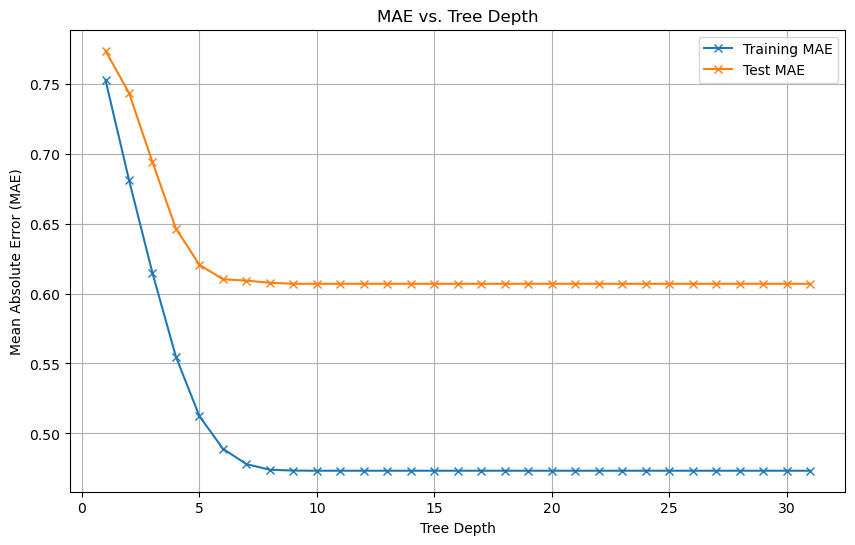

<Figure size 640x480 with 0 Axes>

In [9]:
# import numpy as np
# import matplotlib.pyplot as plt
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.metrics import mean_absolute_error

# Define the range of tree depths to test
tree_depths = range(1, 32)

# Initialize lists to store MAE values
mae_train_list = []
mae_test_list = []

# Iterate over the range of tree depths
for depth in tree_depths:
    # Initialize the RandomForestRegressor with the current depth
    model = RandomForestRegressor(random_state=SEED, n_estimators=50, max_depth=depth, min_samples_split=6, min_samples_leaf=10)
    
    # Fit the model
    model.fit(np.array(list((x_train_strat))).astype(float), y_train_strat)
    
    # Predict on the training set
    y_train_pred = model.predict(np.array(list((x_train_strat))).astype(float))
    
    # Predict on the test set
    y_test_pred = model.predict(np.array(list((x_test_strat))).astype(float))
    
    # Calculate MAE for the training set
    mae_train = mean_absolute_error(y_train_strat, y_train_pred)
    mae_train_list.append(mae_train)
    
    # Calculate MAE for the test set
    mae_test = mean_absolute_error(y_test_strat, y_test_pred)
    mae_test_list.append(mae_test)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(tree_depths, mae_train_list, label='Training MAE', marker='x')
plt.plot(tree_depths, mae_test_list, label='Test MAE', marker='x')
plt.xlabel('Tree Depth')
plt.ylabel('Mean Absolute Error (MAE)')
plt.title('MAE vs. Tree Depth')
plt.legend()
plt.grid(True)
plt.show()

#save this plot to the data folder
plt.savefig(DATA / "MAE_vs_Tree_Depth.png")

# MolsToGrid in MACCS train and test split
### Random Split

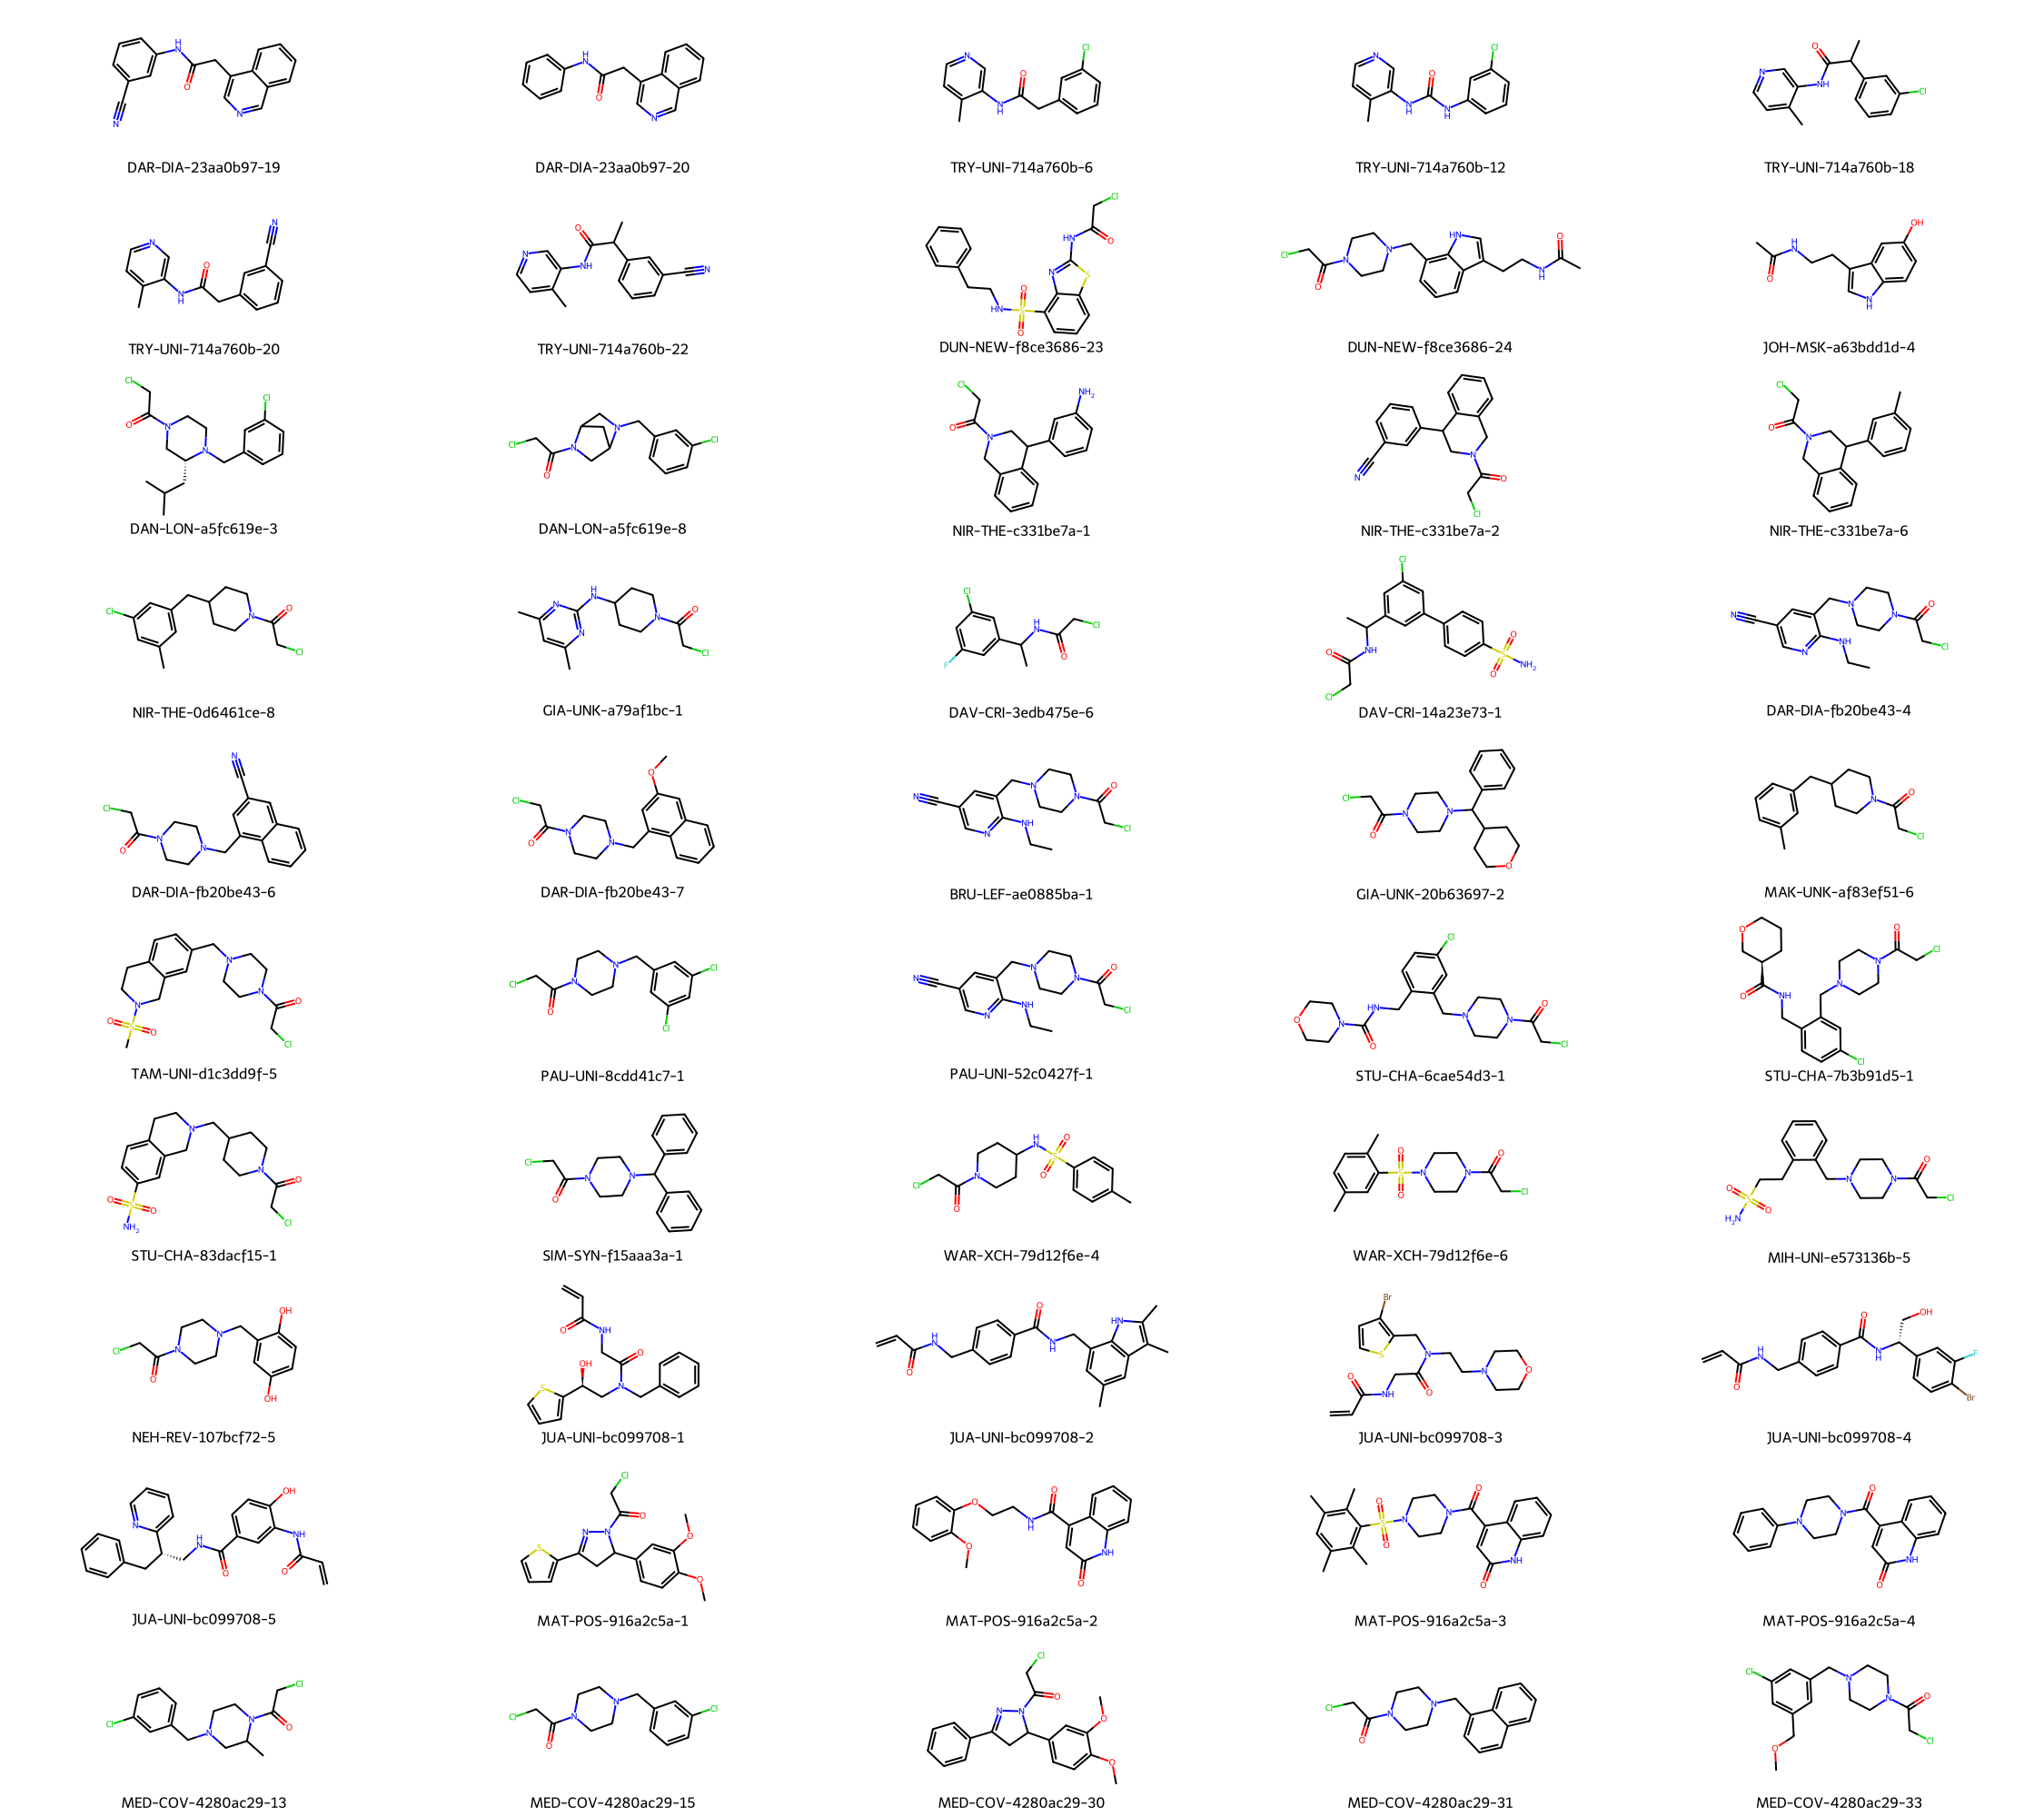

In [10]:
x_train_rand_list = x_train_rand.tolist()
x_train_rand_list_df = compounds[compounds["Fingerprints"].isin(x_train_rand_list)]
x_train_rand_list_SMILES = x_train_rand_list_df ["SMILES"].to_list()
x_train_rand_list_CIDs = x_train_rand_list_df ["CID"].to_list()

# Generate the molecule objects from the SMILES strings
x_train_rand_molecules = [Chem.MolFromSmiles(smiles) for smiles in x_train_rand_list_SMILES]

img_x_train_rand = Draw.MolsToGridImage(
    x_train_rand_molecules,
    molsPerRow=5,
    subImgSize=(450, 200),
    legends=x_train_rand_list_CIDs,
)
display(img_x_train_rand)

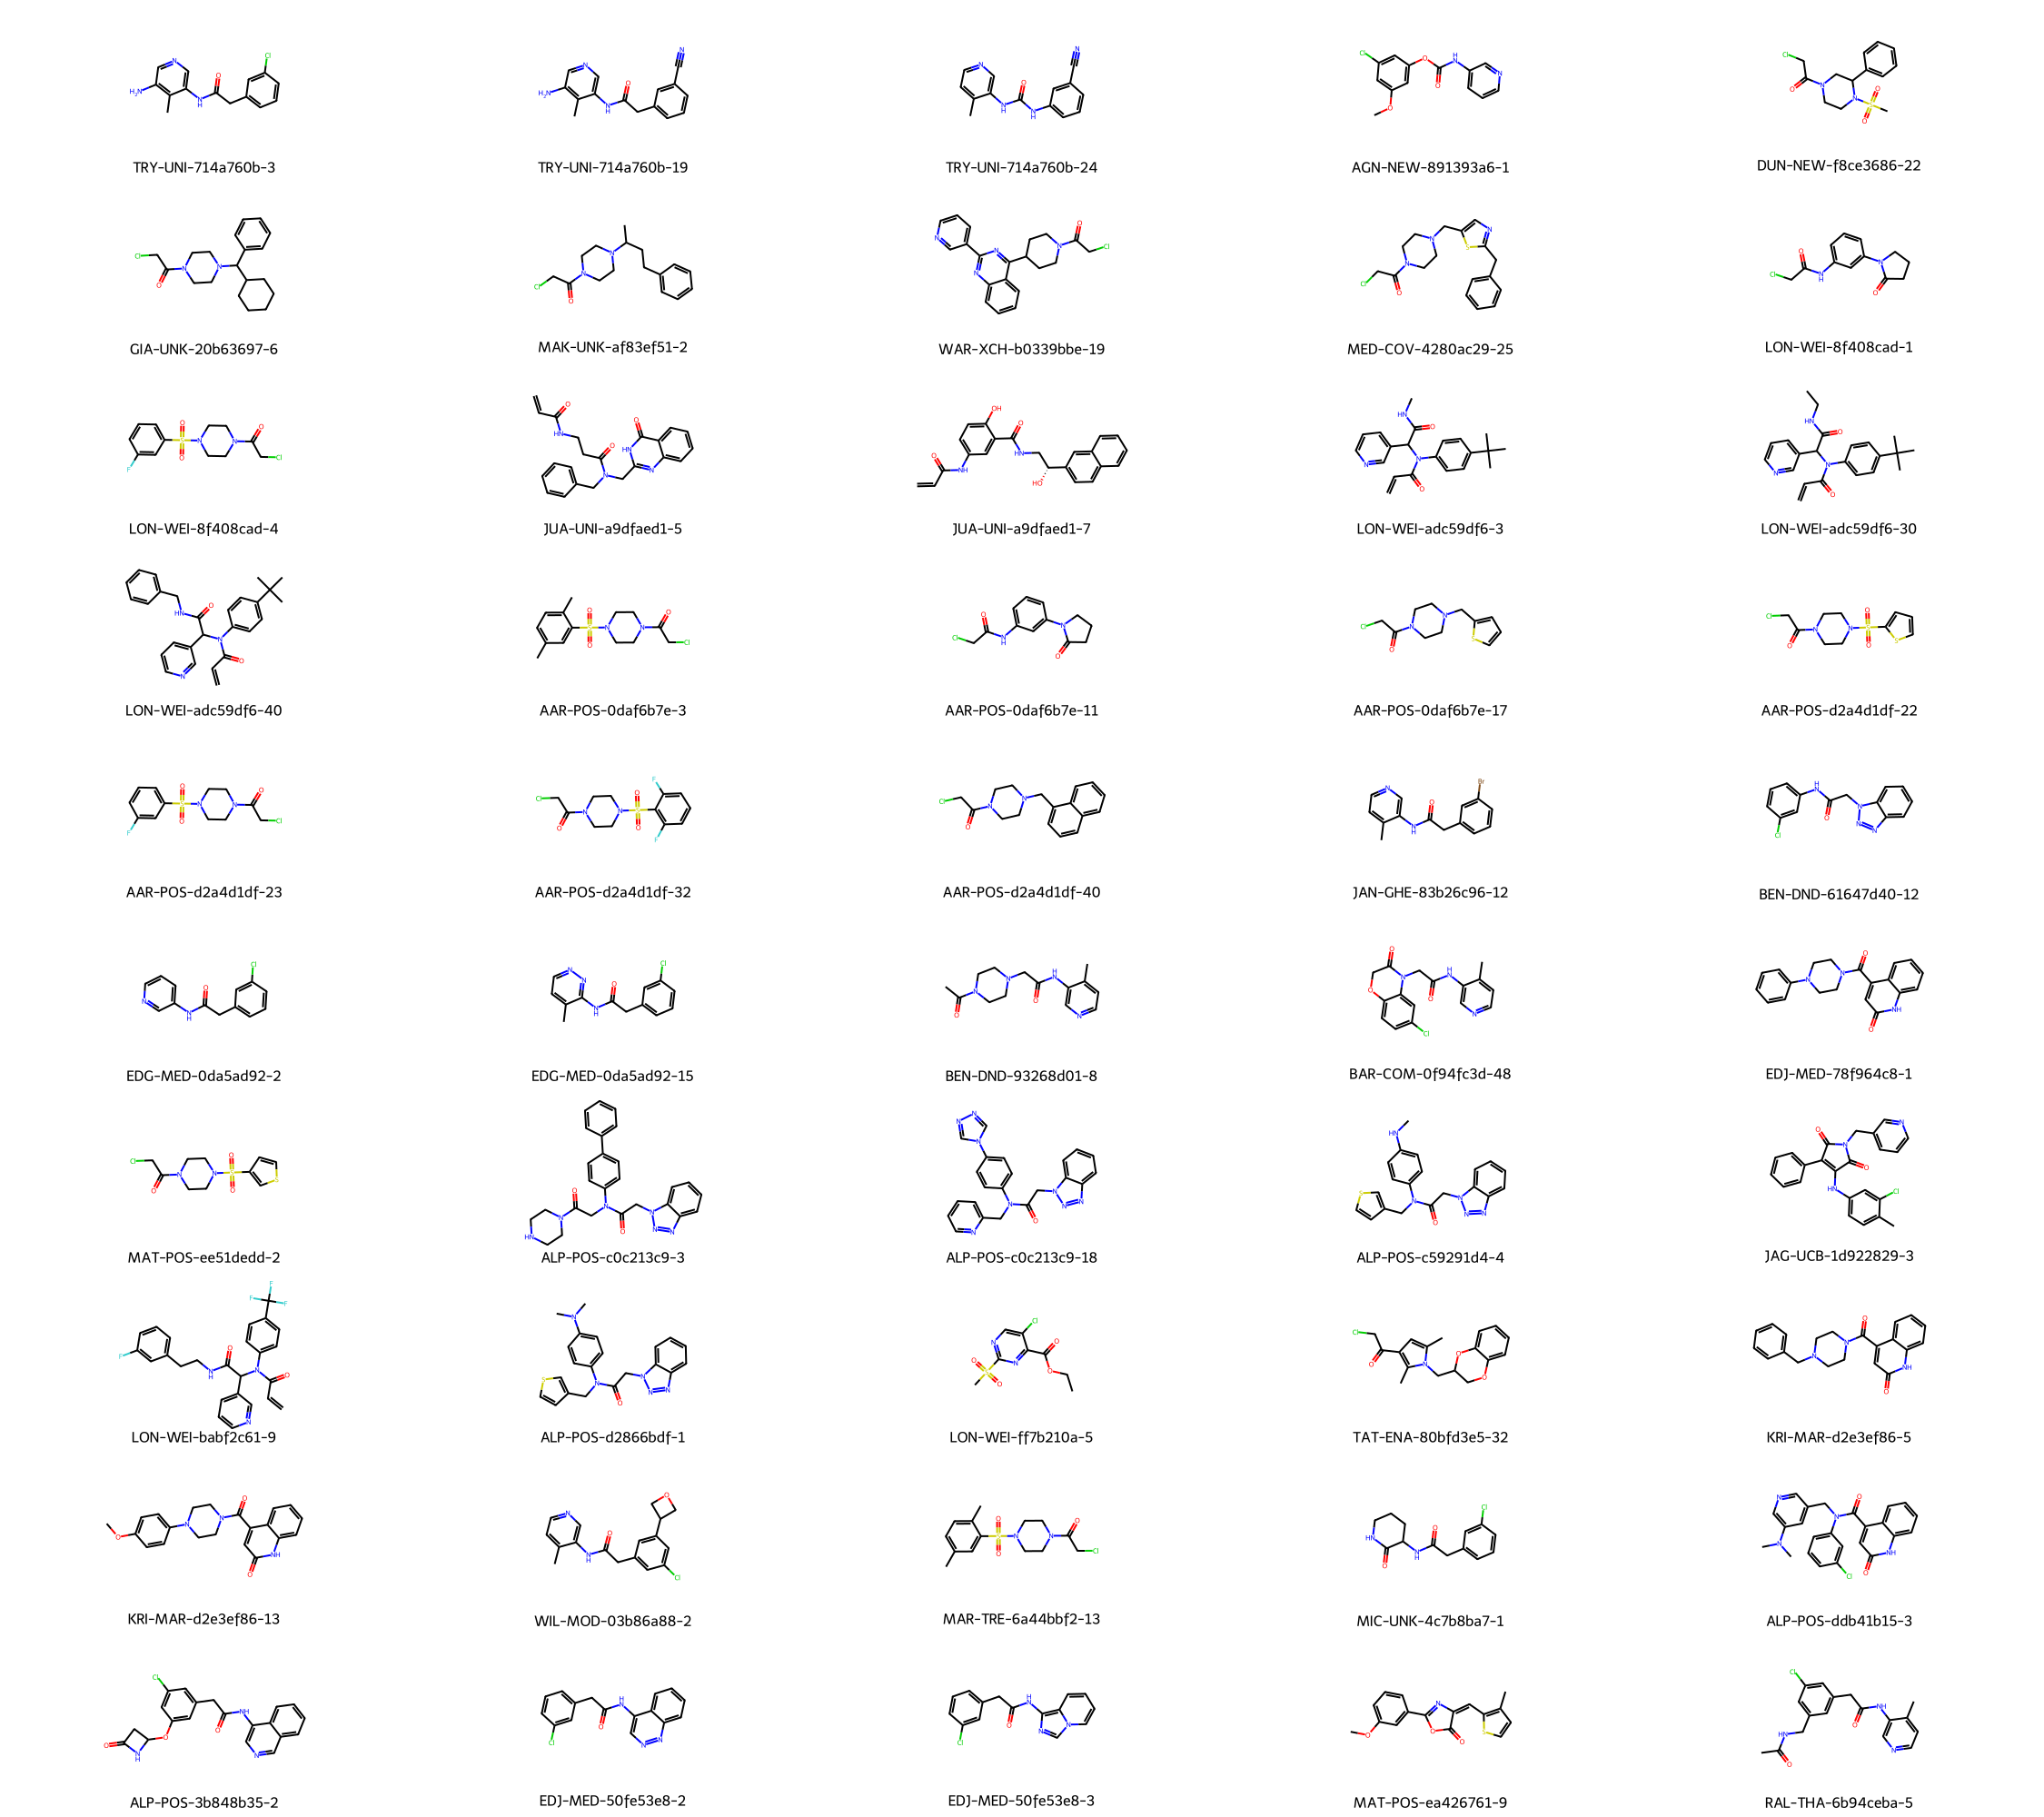

In [11]:
x_test_rand_list = x_test_rand.tolist()
x_test_rand_list_df = compounds[compounds["Fingerprints"].isin(x_test_rand_list)]
x_test_rand_list_SMILES = x_test_rand_list_df["SMILES"].to_list()
x_test_rand_list_CIDs = x_test_rand_list_df["CID"].to_list()

# Generate the molecule objects from the SMILES strings
x_test_rand_molecules = [Chem.MolFromSmiles(smiles) for smiles in x_test_rand_list_SMILES]

img_x_test_rand = Draw.MolsToGridImage(
    x_test_rand_molecules,
    molsPerRow=5,
    subImgSize=(450, 200),
    legends=x_test_rand_list_CIDs,
)
display(img_x_test_rand)

### could do maximum common substructure ? To see if the test molecules are extremely similar?

# Dimensionality reduction (MACCS), UMAP plot of x_train_rand and x_test_rand!
### Furthest Cluster Points

Number of selected points: 119


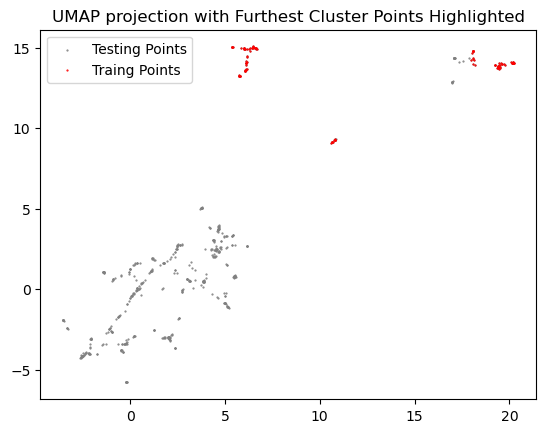

In [12]:
UMAP_highlight_selected_points(compounds)

##### This UMAP plot seems to show that the x_test set seems to contain molecules with a good range of differences. 
##### This seems to indicate that overfitting isn't likely as the training set is also extremely varied.

In [13]:

split_scores_rfr_best_poster = {'Split': ['Default Random', 'Optimised Random', 'Default UMAP Furthest Cluster', 'Optimized UMAP Furthest Cluster'],
        'MACCS MAE': [mae_rfr_rand_MACCS, mae_rfr_rand_best_TPE_MACCS, mae_rfr_fur_MACCS, mae_rfr_fur_best_TPE_MACCS],
        'MACCS MSE': [mse_rfr_rand_MACCS, mse_rfr_rand_best_TPE_MACCS, mse_rfr_fur_MACCS, mse_rfr_fur_best_TPE_MACCS],
        'MACCS R2': [r2_rfr_rand_MACCS, r2_rfr_rand_best_TPE_MACCS, r2_rfr_fur_MACCS,r2_rfr_fur_best_TPE_MACCS ],
        'MACCS Pearson': [pearsoncoef_rfr_rand, pearsoncoef_rfr_rand_best_TPE, pearsoncoef_rfr_fur, pearsoncoef_rfr_fur_best_TPE],
        'MACCS Spearman': [spearmancoef_rfr_rand, spearmancoef_rfr_rand_best_TPE, spearmancoef_rfr_fur, spearmancoef_rfr_fur_best_TPE],
}
split_scores_rfr_best_poster_df = pd.DataFrame(split_scores_rfr_best_poster)
split_scores_rfr_best_poster_df.set_index("Split", inplace=True)
# Round the values to 3 significant figures
split_scores_rfr_best_poster_df = split_scores_rfr_best_poster_df.applymap(lambda x: round(x, 3))
#save df to csv in data file
split_scores_rfr_best_poster_df.to_csv(DATA / "split_scores_rfr_best_poster.csv")
split_scores_rfr_best_poster_df

,MACCS MAE,MACCS MSE,MACCS R2,MACCS Pearson,MACCS Spearman
Split,,,,,
Default Random,0.383,0.309,0.580,0.768,0.751
Optimised Random,0.424,0.326,0.557,0.752,0.737
Default UMAP Furthest Cluster,0.716,0.828,0.161,0.443,0.444
Optimized UMAP Furthest Cluster,0.718,0.808,0.182,0.456,0.434
